In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import pingouin as pg

In [2]:
input_path = r'/Volumes/Behaviour/Tailored 90sec 2P Trials'
output_path = r'/Volumes/Behaviour/Tailored 90sec 2P Trials/Population mean correlations on concatenated trials'
stimuli = ['warm', 'hot', 'opto', 'off-target', 'von frey', 'pin-prick', 'approach', 'no stim', 'session mean']
cfa_mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
last_session = ['2P07_Ses07', '2P08_Ses06', '2P09_Ses05', '2P10_Ses05', '2P11_Ses06']
sessions = [session for session in os.listdir(input_path) if session.endswith('.csv')]
len(sessions)

47

In [17]:
# COMPUTE CORRELATIONS FOR EACH NEURON AGAINST POPULATION MEAN FULL TRACE, PRE/POST STIMULUS 
session_names = []
ses_ave = pd.DataFrame()

for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    if session.endswith('2P08_Ses03.csv'): # doens't have opto trials ...
        continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    print(ses_name)
    session_names.append(ses_name)
    
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    cell_ids = list(cells.columns[:-1])
    
    li = []
    
    for s in stimuli:
        full = pd.DataFrame()
        pre = pd.DataFrame()
        post = pd.DataFrame()
        modality = cells[cells['identifier'].str.contains(str((s)))]
        trials = modality['identifier'].unique()
        
        for t in trials:
            trial = modality[modality['identifier']==t]
            full = pd.concat([full, trial])
            preS = trial[:153]
            pre = pd.concat([pre, preS])
            postS = trial[183:]
            post = pd.concat([post, postS])
            
        # calculate and plot pair-wise correlation of concatenated trials for each cell by modality
        full = full.drop('identifier', axis=1)
        full_mean = full.mean(axis=1)
        pre = pre.drop('identifier', axis=1)
        pre_mean = pre.mean(axis=1)
        post = post.drop('identifier', axis=1)
        post_mean = post.mean(axis=1)
    
        for c in cell_ids: # for each cell in a session, compute Pearsons' r by correlating with population mean
            P,_ = pearsonr(full[c], full_mean)
            li.append([ses_name, s, 'full', c, P])
            P,_ = pearsonr(pre[c],pre_mean)
            li.append([ses_name, s, 'pre', c, P])
            P,_ = pearsonr(post[c],post_mean)
            li.append([ses_name, s, 'post', c, P])    
        
    cols = ['session', 'modality', 'epoch', 'cell',  'Pearsons R']
    pop_corr = pd.DataFrame(li, columns=cols)
#     pop_corr.to_csv(os.path.join(output_path, 'pop_corr_'+ses_name+'.csv'))

#     ax = sns.boxplot(x="modality", y="Pearsons R", hue="pre/post", data=pop_corr, color='.3')
#     ax.legend(bbox_to_anchor= (1.2,1))
#     ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
#     plt.ylim(-1,1)
#     ax.set(title= ses_name+': Pearsons R for each cell against population mean')
#     plt.savefig(os.path.join(output_path, ses_name+'_pop_corr.png'), bbox_inches='tight')
#     plt.show()
    
    averages = []
    for s in stimuli:
        stim = pop_corr[pop_corr['modality']==s]
        full_ave = stim[stim['epoch']=='full']['Pearsons R'].mean(axis=0)
        averages.append([ses_name, s, 'full', full_ave])
        pre_ave = stim[stim['epoch']=='pre']['Pearsons R'].mean(axis=0)
        averages.append([ses_name, s, 'pre', pre_ave])
        post_ave = stim[stim['epoch']=='post']['Pearsons R'].mean(axis=0)
        averages.append([ses_name, s, 'post', post_ave])
    all_full = pop_corr[pop_corr['epoch']=='full']['Pearsons R'].mean(axis=0)
    averages.append([ses_name, 'session mean', 'full', all_full])
    all_pre = pop_corr[pop_corr['epoch']=='pre']['Pearsons R'].mean(axis=0)
    averages.append([ses_name, 'session mean', 'pre', all_pre])
    all_post = pop_corr[pop_corr['epoch']=='post']['Pearsons R'].mean(axis=0)
    averages.append([ses_name, 'session mean', 'post', all_post])
    cols = ['session', 'modality', 'epoch', 'mean population R']
    df = pd.DataFrame(averages, columns=cols)

    ses_ave = pd.concat([ses_ave, df])

ses_ave['mouse'] = ses_ave['session'].apply(lambda x: x[:4])
ses_ave['cfa'] = ses_ave['session'].apply(lambda x: 'cfa' if 'CFA' in x else 'health') 
ses_ave.to_csv(os.path.join(output_path, 'population correlation session means 90 sec.csv'))

processing:  dF_F0_LONG_2P06_Ses01.csv
2P06_Ses01
processing:  dF_F0_LONG_2P06_Ses02.csv
2P06_Ses02
processing:  dF_F0_LONG_2P06_Ses03.csv
2P06_Ses03
processing:  dF_F0_LONG_2P05_Ses04.csv
2P05_Ses04
processing:  dF_F0_LONG_2P06_Ses04.csv
2P06_Ses04
processing:  dF_F0_LONG_2P06_Ses05.csv
2P06_Ses05
processing:  dF_F0_LONG_2P05_Ses06.csv
2P05_Ses06
processing:  dF_F0_LONG_2P06_Ses06.csv
2P06_Ses06
processing:  dF_F0_LONG_2P05_Ses07.csv
2P05_Ses07
processing:  dF_F0_LONG_2P06_Ses07.csv
2P06_Ses07
processing:  dF_F0_LONG_2P07_Ses01.csv
2P07_Ses01
processing:  dF_F0_LONG_2P08_Ses01.csv
2P08_Ses01
processing:  dF_F0_LONG_2P07_Ses03.csv
2P07_Ses03
processing:  dF_F0_LONG_2P08_Ses02.csv
2P08_Ses02
processing:  dF_F0_LONG_2P07_Ses04.csv
2P07_Ses04
processing:  dF_F0_LONG_2P07_Ses05.csv
2P07_Ses05
processing:  dF_F0_LONG_2P08_Ses04.csv
2P08_Ses04
processing:  dF_F0_LONG_2P07_Ses06.csv
2P07_Ses06
processing:  dF_F0_LONG_2P08_Ses05.csv
2P08_Ses05
processing:  dF_F0_LONG_2P07_Ses07.csv
2P07_Ses07


In [4]:
ses_ave = pd.read_csv(os.path.join(output_path, 'population correlation session means 90 sec.csv'), index_col=0)
ses_ave.head()

,session,modality,epoch,mean population R,mouse,cfa
0,2P06_Ses01,warm,full,0.161975,2P06,health
1,2P06_Ses01,warm,pre,0.151167,2P06,health
2,2P06_Ses01,warm,post,0.159500,2P06,health
3,2P06_Ses01,hot,full,0.152830,2P06,health
4,2P06_Ses01,hot,pre,0.107143,2P06,health


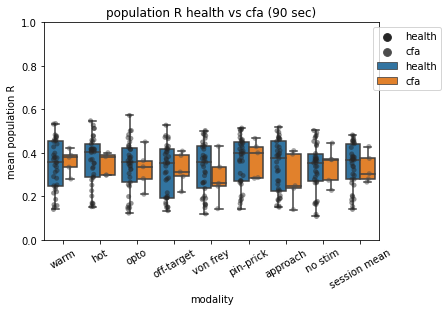

        Source  ddof1        H     p-unc
Kruskal    cfa      1  1.05167  0.305123


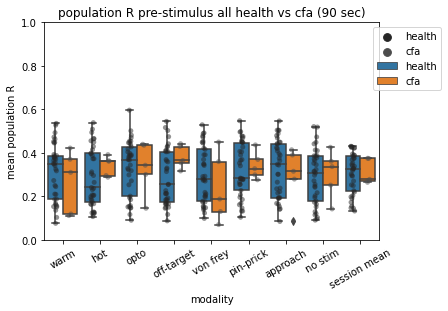

        Source  ddof1         H     p-unc
Kruskal    cfa      1  0.015446  0.901092


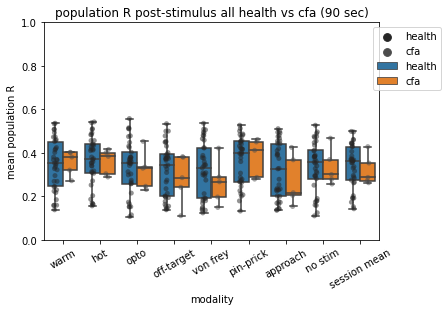

        Source  ddof1         H     p-unc
Kruskal    cfa      1  1.370933  0.241652


,session,modality,epoch,mean population R,mouse,cfa
2,2P06_Ses01,warm,post,0.159500,2P06,health
5,2P06_Ses01,hot,post,0.165584,2P06,health
8,2P06_Ses01,opto,post,0.107373,2P06,health
11,2P06_Ses01,off-target,post,0.163416,2P06,health
14,2P06_Ses01,von frey,post,0.191174,2P06,health


In [5]:
# Plot popR for health (all sessions) & cfa
popR_full = ses_ave.loc[ses_ave['epoch']=='full']
popR_pre = ses_ave.loc[ses_ave['epoch']=='pre']
popR_post = ses_ave.loc[ses_ave['epoch']=='post']

ax = sns.stripplot(x="modality", y="mean population R", hue='cfa', data=popR_full, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue='cfa', data=popR_full)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(0,1)
ax.set(title='population R health vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'population R all health vs cfa 90sec.png'), bbox_inches='tight')
plt.show()

print(pg.kruskal(data=popR_full, dv="mean population R", between="cfa"))

ax = sns.stripplot(x="modality", y="mean population R", hue='cfa', data=popR_pre, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue='cfa', data=popR_pre)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(0,1)
ax.set(title='population R pre-stimulus all health vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'population R pre-stimulus all health vs cfa (90sec).png'), bbox_inches='tight')
plt.show()

print(pg.kruskal(data=popR_pre, dv="mean population R", between="cfa"))

ax = sns.stripplot(x="modality", y="mean population R", hue='cfa', data=popR_post, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue='cfa', data=popR_post)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(0,1)
ax.set(title='population R post-stimulus all health vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'population R post-stimulus all health vs cfa (90 sec).png'), bbox_inches='tight')
plt.show()

print(pg.kruskal(data=popR_post, dv="mean population R", between="cfa"))
popR_post.head()

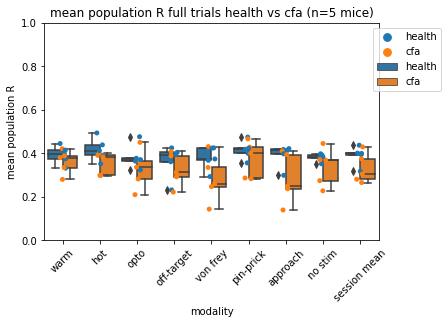

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.36      1  1.8  0.179712
            Source         W  ddof1          Q     p-unc
Friedman  modality  0.329333      8  13.173333  0.106023
von frey full trial population R:  1.0 0.125
no stim full trial population R:  3.0 0.3125
session mean full trial population R:  2.0 0.1875


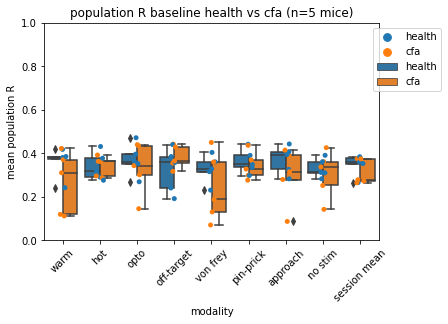

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.36      1  1.8  0.179712
            Source         W  ddof1         Q     p-unc
Friedman  modality  0.205333      8  8.213333  0.412914
von frey baseline population R:  3.0 0.3125
no stim baseline population R:  7.0 1.0
session mean baseline population R:  3.0 0.3125


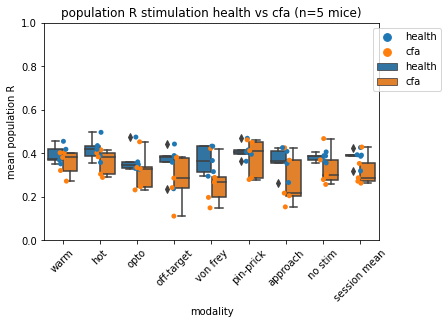

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.36      1  1.8  0.179712
            Source      W  ddof1      Q     p-unc
Friedman  modality  0.484      8  19.36  0.013049
von frey stimulation trial population R:  0.0 0.0625
no stim stimulation population R:  3.0 0.3125
session mean stimulation population R:  2.0 0.1875


In [6]:
# Plot popR for health (n=5) & cfa full trial

stats_list = []
cols = ['mouse', 'modality', 'cfa', 'mean population R']
mice = ['2P07', '2P08', '2P09', '2P10', '2P11']
for m in mice:
    by_mouse = popR_full.loc[popR_full['session'].str.contains(m)]
    for s in stimuli:
        health = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='health')]['mean population R'].mean()
        cfa = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='cfa')]['mean population R'].mean()
        stats = [m, s, 'health', health]
        stats_list.append(stats)
        stats = [m, s, 'cfa', cfa]
        stats_list.append(stats)
   
stats_df = pd.DataFrame(stats_list, columns = cols)
stats_df.to_csv(os.path.join(output_path, 'stats by mouse population R full trial 90sec.csv'))
ax = sns.stripplot(x='modality', y='mean population R', hue='cfa', data=stats_df)
ax = sns.boxplot(x='modality', y='mean population R', hue='cfa', data=stats_df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(0, 1)
plt.title('mean population R full trials health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'mean population R full trials health vs cfa (n=5).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=stats_df, dv="mean population R", within="cfa", subject="mouse"))
print(pg.friedman(data=stats_df, dv="mean population R", within="modality", subject="mouse"))

VF_health = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='health')]
VF_cfa = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='cfa')]
d = np.array(VF_health['mean population R']) - np.array(VF_cfa['mean population R'])
res = wilcoxon(d)
print('von frey full trial population R: ', res.statistic, res.pvalue)

noStim_health = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='health')]
noStim_cfa = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='cfa')]
d = np.array(noStim_health['mean population R']) - np.array(noStim_cfa['mean population R'])
res = wilcoxon(d)
print('no stim full trial population R: ', res.statistic, res.pvalue)

sesMean_health = stats_df.loc[(stats_df['modality']=='session mean') & (stats_df['cfa']=='health')]
sesMean_cfa = stats_df.loc[(stats_df['modality']=='session mean') & (stats_df['cfa']=='cfa')]
d = np.array(sesMean_health['mean population R']) - np.array(sesMean_cfa['mean population R'])
res = wilcoxon(d)
print('session mean full trial population R: ', res.statistic, res.pvalue)



# MEAN popR BASELINE CFA MICE ONLY 
stats_list = []
for m in mice:
    by_mouse = popR_pre.loc[popR_pre['session'].str.contains(m)]
    for s in stimuli:
        health = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='health')]['mean population R'].mean()
        cfa = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='cfa')]['mean population R'].mean()
        stats = [m, s, 'health', health]
        stats_list.append(stats)
        stats = [m, s, 'cfa', cfa]
        stats_list.append(stats)
   
stats_df = pd.DataFrame(stats_list, columns = cols)
stats_df.to_csv(os.path.join(output_path, 'stats by mouse population R baseline 90sec.csv'))
ax = sns.stripplot(x='modality', y='mean population R', hue='cfa', data=stats_df)
ax = sns.boxplot(x='modality', y='mean population R', hue='cfa', data=stats_df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(0, 1)
plt.title('population R baseline health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'population R baseline health vs cfa (n=5).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=stats_df, dv="mean population R", within="cfa", subject="mouse"))
print(pg.friedman(data=stats_df, dv="mean population R", within="modality", subject="mouse"))

VF_health = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='health')]
VF_cfa = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='cfa')]
d = np.array(VF_health['mean population R']) - np.array(VF_cfa['mean population R'])
res = wilcoxon(d)
print('von frey baseline population R: ', res.statistic, res.pvalue)

noStim_health = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='health')]
noStim_cfa = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='cfa')]
d = np.array(noStim_health['mean population R']) - np.array(noStim_cfa['mean population R'])
res = wilcoxon(d)
print('no stim baseline population R: ', res.statistic, res.pvalue)

sesMean_health = stats_df.loc[(stats_df['modality']=='session mean') & (stats_df['cfa']=='health')]
sesMean_cfa = stats_df.loc[(stats_df['modality']=='session mean') & (stats_df['cfa']=='cfa')]
d = np.array(sesMean_health['mean population R']) - np.array(sesMean_cfa['mean population R'])
res = wilcoxon(d)
print('session mean baseline population R: ', res.statistic, res.pvalue)


# MEAN popR STIMULATION CFA MICE ONLY 
stats_list = []
for m in mice:
    by_mouse = popR_post.loc[popR_post['session'].str.contains(m)]
    for s in stimuli:
        health = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='health')]['mean population R'].mean()
        cfa = by_mouse[(by_mouse['modality']==s)&(by_mouse['cfa']=='cfa')]['mean population R'].mean()
        stats = [m, s, 'health', health]
        stats_list.append(stats)
        stats = [m, s, 'cfa', cfa]
        stats_list.append(stats)
   
stats_df = pd.DataFrame(stats_list, columns = cols)
stats_df.to_csv(os.path.join(output_path, 'stats by mouse population R stimulation 90sec.csv'))
ax = sns.stripplot(x='modality', y='mean population R', hue='cfa', data=stats_df)
ax = sns.boxplot(x='modality', y='mean population R', hue='cfa', data=stats_df)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
plt.ylim(0, 1)
plt.title('population R stimulation health vs cfa (n=5 mice)')
plt.savefig(os.path.join(output_path, 'population R stimulation health vs cfa (n=5).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=stats_df, dv="mean population R", within="cfa", subject="mouse"))
print(pg.friedman(data=stats_df, dv="mean population R", within="modality", subject="mouse"))

VF_health = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='health')]
VF_cfa = stats_df.loc[(stats_df['modality']=='von frey') & (stats_df['cfa']=='cfa')]
d = np.array(VF_health['mean population R']) - np.array(VF_cfa['mean population R'])
res = wilcoxon(d)
print('von frey stimulation trial population R: ', res.statistic, res.pvalue)

noStim_health = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='health')]
noStim_cfa = stats_df.loc[(stats_df['modality']=='no stim') & (stats_df['cfa']=='cfa')]
d = np.array(noStim_health['mean population R']) - np.array(noStim_cfa['mean population R'])
res = wilcoxon(d)
print('no stim stimulation population R: ', res.statistic, res.pvalue)

sesMean_health = stats_df.loc[(stats_df['modality']=='session mean') & (stats_df['cfa']=='health')]
sesMean_cfa = stats_df.loc[(stats_df['modality']=='session mean') & (stats_df['cfa']=='cfa')]
d = np.array(sesMean_health['mean population R']) - np.array(sesMean_cfa['mean population R'])
res = wilcoxon(d)
print('session mean stimulation population R: ', res.statistic, res.pvalue)



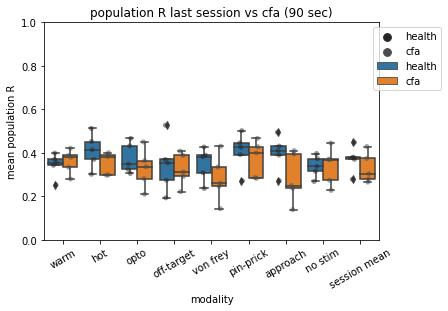

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.36      1  1.8  0.179712
von frey full trial population R:  5.0 0.625
no stim full trial population R:  5.0 0.625
session mean full trial population R:  3.0 0.3125


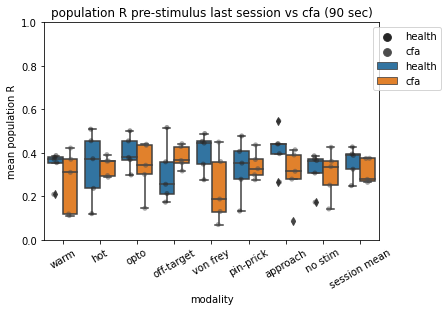

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.36      1  1.8  0.179712
von frey baseline population R:  5.0 0.625
no stim baseline population R:  7.0 1.0
session mean baseline population R:  5.0 0.625


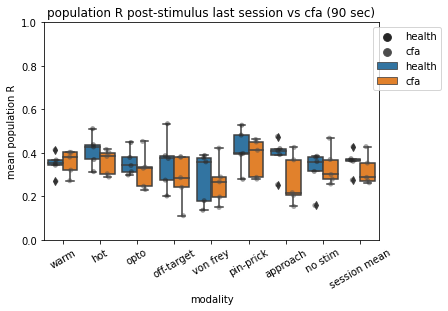

         Source     W  ddof1    Q     p-unc
Friedman    cfa  0.36      1  1.8  0.179712
von frey stimulation population R:  7.0 1.0
no stim stimulation population R:  5.0 0.625
session mean stimulation population R:  3.0 0.3125


In [8]:
# NEURON TO POPULATION MEAN R COMPARING LAST SESSION TO CFA
popR_full = popR_full.loc[popR_full['session'].str.contains('CFA')|popR_full['session'].isin(last_session)]
popR_pre =popR_pre.loc[popR_pre['session'].str.contains('CFA')|popR_pre['session'].isin(last_session)]
popR_post = popR_post.loc[popR_post['session'].str.contains('CFA')|popR_post['session'].isin(last_session)]

ax = sns.stripplot(x="modality", y="mean population R", hue='cfa', data=popR_full, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue='cfa', data=popR_full)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(0,1)
ax.set(title='population R last session vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'population R last vs cfa 90sec.png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=popR_full, dv="mean population R", within="cfa", subject='mouse'))

VF_health = popR_full.loc[(popR_full['modality']=='von frey') & (popR_full['cfa']=='health')]
VF_cfa = popR_full.loc[(popR_full['modality']=='von frey') & (popR_full['cfa']=='cfa')]
d = np.array(noStim_health['mean population R']) - np.array(noStim_cfa['mean population R'])
res = wilcoxon(d)
print('von frey full trial population R: ', res.statistic, res.pvalue)

noStim_health = popR_full.loc[(popR_full['modality']=='no stim') & (popR_full['cfa']=='health')]
noStim_cfa = popR_full.loc[(popR_full['modality']=='no stim') & (popR_full['cfa']=='cfa')]
d = np.array(noStim_health['mean population R']) - np.array(noStim_cfa['mean population R'])
res = wilcoxon(d)
print('no stim full trial population R: ', res.statistic, res.pvalue)

sesMean_health = popR_full.loc[(popR_full['modality']=='session mean') & (popR_full['cfa']=='health')]
sesMean_cfa = popR_full.loc[(popR_full['modality']=='session mean') & (popR_full['cfa']=='cfa')]
d = np.array(sesMean_health['mean population R']) - np.array(sesMean_cfa['mean population R'])
res = wilcoxon(d)
print('session mean full trial population R: ', res.statistic, res.pvalue)


ax = sns.stripplot(x="modality", y="mean population R", hue='cfa', data=popR_pre, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue='cfa', data=popR_pre)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(0,1)
ax.set(title='population R pre-stimulus last session vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'population R pre-stimulus last session vs cfa (90sec).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=popR_full, dv="mean population R", within="cfa", subject='mouse'))

VF_health = popR_pre.loc[(popR_pre['modality']=='von frey') & (popR_pre['cfa']=='health')]
VF_cfa = popR_pre.loc[(popR_pre['modality']=='von frey') & (popR_pre['cfa']=='cfa')]
d = np.array(noStim_health['mean population R']) - np.array(noStim_cfa['mean population R'])
res = wilcoxon(d)
print('von frey baseline population R: ', res.statistic, res.pvalue)

noStim_health = popR_pre.loc[(popR_pre['modality']=='no stim') & (popR_pre['cfa']=='health')]
noStim_cfa = popR_pre.loc[(popR_pre['modality']=='no stim') & (popR_pre['cfa']=='cfa')]
d = np.array(noStim_health['mean population R']) - np.array(noStim_cfa['mean population R'])
res = wilcoxon(d)
print('no stim baseline population R: ', res.statistic, res.pvalue)

sesMean_health = popR_pre.loc[(popR_pre['modality']=='session mean') & (popR_pre['cfa']=='health')]
sesMean_cfa = popR_pre.loc[(popR_pre['modality']=='session mean') & (popR_pre['cfa']=='cfa')]
d = np.array(sesMean_health['mean population R']) - np.array(sesMean_cfa['mean population R'])
res = wilcoxon(d)
print('session mean baseline population R: ', res.statistic, res.pvalue)

ax = sns.stripplot(x="modality", y="mean population R", hue='cfa', data=popR_post, color='.3', alpha=0.5, dodge=True)
ax = sns.boxplot(x="modality", y="mean population R", hue='cfa', data=popR_post)
ax.legend(bbox_to_anchor= (1.2,1))
#ax.legend([],[], frameon=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(0,1)
ax.set(title='population R post-stimulus last session vs cfa (90 sec)')
plt.savefig(os.path.join(output_path, 'population R post-stimulus last session vs cfa (90 sec).png'), bbox_inches='tight')
plt.show()

print(pg.friedman(data=popR_full, dv="mean population R", within="cfa", subject='mouse'))

VF_health = popR_post.loc[(popR_post['modality']=='von frey') & (popR_post['cfa']=='health')]
VF_cfa = popR_post.loc[(popR_post['modality']=='von frey') & (popR_post['cfa']=='cfa')]
d = np.array(noStim_health['mean population R']) - np.array(noStim_cfa['mean population R'])
res = wilcoxon(d)
print('von frey stimulation population R: ', res.statistic, res.pvalue)

noStim_health = popR_post.loc[(popR_post['modality']=='no stim') & (popR_post['cfa']=='health')]
noStim_cfa = popR_post.loc[(popR_post['modality']=='no stim') & (popR_post['cfa']=='cfa')]
d = np.array(noStim_health['mean population R']) - np.array(noStim_cfa['mean population R'])
res = wilcoxon(d)
print('no stim stimulation population R: ', res.statistic, res.pvalue)

sesMean_health = popR_post.loc[(popR_post['modality']=='session mean') & (popR_post['cfa']=='health')]
sesMean_cfa = popR_post.loc[(popR_post['modality']=='session mean') & (popR_post['cfa']=='cfa')]
d = np.array(sesMean_health['mean population R']) - np.array(sesMean_cfa['mean population R'])
res = wilcoxon(d)
print('session mean stimulation population R: ', res.statistic, res.pvalue)


processing:  dF_F0_LONG_2P06_Ses01.csv
2P06_Ses01
processing:  dF_F0_LONG_2P06_Ses02.csv
2P06_Ses02
processing:  dF_F0_LONG_2P06_Ses03.csv
2P06_Ses03
processing:  dF_F0_LONG_2P05_Ses04.csv
2P05_Ses04
processing:  dF_F0_LONG_2P06_Ses04.csv
2P06_Ses04
processing:  dF_F0_LONG_2P06_Ses05.csv
2P06_Ses05
processing:  dF_F0_LONG_2P05_Ses06.csv
2P05_Ses06
processing:  dF_F0_LONG_2P06_Ses06.csv
2P06_Ses06
processing:  dF_F0_LONG_2P05_Ses07.csv
2P05_Ses07
processing:  dF_F0_LONG_2P06_Ses07.csv
2P06_Ses07
processing:  dF_F0_LONG_2P07_Ses01.csv
2P07_Ses01
processing:  dF_F0_LONG_2P08_Ses01.csv
2P08_Ses01
processing:  dF_F0_LONG_2P07_Ses03.csv
2P07_Ses03
processing:  dF_F0_LONG_2P08_Ses02.csv
2P08_Ses02
processing:  dF_F0_LONG_2P07_Ses04.csv
2P07_Ses04
processing:  dF_F0_LONG_2P07_Ses05.csv
2P07_Ses05
processing:  dF_F0_LONG_2P08_Ses04.csv
2P08_Ses04
processing:  dF_F0_LONG_2P07_Ses06.csv
2P07_Ses06
processing:  dF_F0_LONG_2P08_Ses05.csv
2P08_Ses05
processing:  dF_F0_LONG_2P07_Ses07.csv
2P07_Ses07


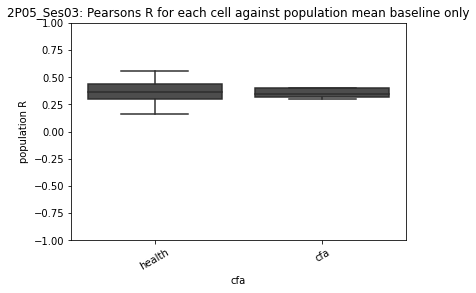

In [24]:
# COMPUTE CORRELATIONS FOR EACH NEURON AGAINST POPULATION MEAN FOR BASELINE ACROSS ALL TRIALS
session_names = []
ses_ave = pd.DataFrame()

sessionR = []
for session in sessions:
    if session.startswith('._'): # circumventing issues with invisible files on external drives
        continue
    if session.endswith('2P05_Ses01.csv'): # excluding for the time being incomplete sessions (half-sessions)
        continue
    if session.endswith('2P05_Ses02.csv'):
        continue
    if session.endswith('2P07_Ses02.csv'):
        continue
    if session.endswith('2P11_Ses03.csv'):
        continue
    if session.endswith('2P08_Ses03.csv'): # doens't have opto trials ...
        continue
    
    print('processing: ', session)
    entries = session.split('_')
    
    if session.endswith('CFA.csv'): 
        ses_name = entries[3]+'_'+entries[4][:3]
        
    else:
        ses_name = entries[3]+'_'+entries[4][:5]
            
    print(ses_name)
    session_names.append(ses_name)
    
    cells = pd.read_csv(os.path.join(input_path,session), index_col=0)
    cell_ids = list(cells.columns[:-1])
    trials = cells['identifier'].unique()
        
    pre = pd.DataFrame()
    li = []
    
    for t in trials:
        trial = cells[cells['identifier']==t]
        preS = trial[:153]
        pre = pd.concat([pre, preS])
            
        # calculate and plot pair-wise correlation of concatenated trials for each cell by modality
        pre = pre.drop('identifier', axis=1)
        pre_mean = pre.mean(axis=1)
    
        for c in cell_ids: # for each cell in a session, compute Pearsons' r by correlating with population mean
            P,_ = pearsonr(pre[c],pre_mean)
            li.append([ses_name, c, P])
        
    cols = ['session', 'cell',  'Pearsons R']
    
    pop_corr_pre = pd.DataFrame(li, columns=cols)
    pop_corr_pre.to_csv(os.path.join(output_path, 'pop_corr_per_'+ses_name+'.csv'))
    mean_R = pop_corr_pre['Pearsons R'].mean()
    sessionR.append([ses_name, mean_R])

cols = ['session', 'population R']
sessionR = pd.DataFrame(sessionR, columns=cols)
sessionR['mouse'] = sessionR['session'].apply(lambda x: x[:4])
sessionR['cfa'] = sessionR['session'].apply(lambda x: 'cfa' if 'CFA' in x else 'health') 

sessionR.to_csv(os.path.join(output_path, 'population correlation baselines.csv'))

ax = sns.boxplot(x="cfa", y="population R", data=sessionR, color='.3')
#ax.legend(bbox_to_anchor= (1.2,1))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(-1,1)
ax.set(title= ses_name+': Pearsons R for each cell against population mean baseline only')
#plt.savefig(os.path.join(output_path, ses_name+'_pop_corr.png'), bbox_inches='tight')
plt.show()



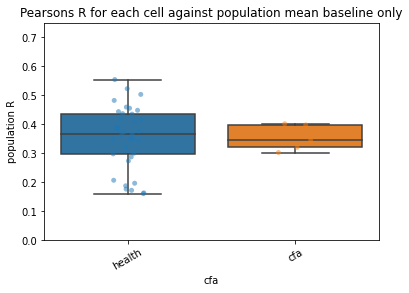

In [28]:
ax = sns.boxplot(x="cfa", y="population R", data=sessionR)
ax = sns.stripplot(x="cfa", y="population R", data=sessionR, alpha=0.5)
#ax.legend(bbox_to_anchor= (1.2,1))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.ylim(0,0.75)
ax.set(title= 'Pearsons R for each cell against population mean baseline only')
plt.savefig(os.path.join(output_path, 'baseline_pop_corr.png'), bbox_inches='tight')
plt.show()